In [1]:
#Dr X, I'm happy to finish this assignment for you
#First let's import all of the necessary BioPython materials
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.Alphabet import IUPAC
#Source http://biopython.org/wiki/Seq

In [2]:
#Lets not forget the codontable, this will be useful for converting nucleotides to amino acids
from Bio.Data import CodonTable

In [3]:
#Pandas is a powerful tool for data manipulation and dataframe creation, we'll be 
#using it quite frequently in this exercise
import pandas as pd

In [405]:
#This is the function you wrote for getting the sequences from our fasta files.  Lets document
#this in more detail
def get_sequences_from_file(fasta_fn):
    sequence_data_dict = {}
    for record in SeqIO.parse(fasta_fn, "fasta"):
        description = record.description.split()
        species_name = description[1] + " " + description[2]
        sequence_data_dict[species_name] = record.seq
    return(sequence_data_dict)
#The first line is creating the function which we define as getting sequences from the fasta
#file the fasta_fn is a fill in for the file name of the fasta file
#Line 2 is the creation of an empty dictionary which you called sequence_data_dict
#Line 3 creates a for loop to which we use a SeqIO parse function to look for fasta
#information from a file fasta
#Line 4 splits the information in the file to create a description
#Line 5 creates the variable species name which is a combination of genus and species
#Line 6 creates a record.seq which is the sequence_data_dict with the species name
#Finally line 7 returns the information from the for loop as the sequence_data_dict
#Source https://www.biostars.org/p/710/, https://docs.python.org/3/tutorial/datastructures.html,
#http://biopython.org/wiki/SeqRecord

In [406]:
#Dr. X, you did a good job outlining this function for me but it appears it needs to be 
#completed for it to work properly
def translate_function(string_nucleotides): 
    mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"] 
    aa_seq_string = ""
    for n in range(0, len(string_nucleotides),3):
        codon = string_nucleotides[n:n+3]
        if codon in mito_table.stop_codons: 
            break
        else: 
            aa_seq_string = aa_seq_string + mito_table.forward_table[codon]
    return(aa_seq_string)
#This is again creating a function that we can use for downstream applications, from the name
#you define it seems that it is meant to translate strings of nucleotides (line 1)
#Line 2 loads the codon table we will be using for the translation.  It is a table for Vertebrate
#Mitochondria based on coding DNA sequence
#Line three is creating an empty string to which the following for loop will be created as
#Line 4 starts the for loop and is using the value n in a range subset to create ranges of length
#three
#Line 5 is creating the variable codon to which will be three nucleotides within the range we
#created
#Line 6 starts an if statement to which if the codon or string of three nucleotides is present
#in that table of stop codons the loop will stop for that file (break)
#Line 7 follows the break and is the else statement to which if the codon isn't found in the
#stop codon table it will be added to the AA sequence string creating the translation(s) we 
#need
#Line 8 is the return value
#Source:https://www.biostars.org/p/2903/, http://hplgit.github.io/bioinf-py/doc/pub/bioinf-py.html

In [395]:
#Dr X I've created a function that will do the same as your above outlined function but with 
#less amount of code and using Biopython
#Line 1 is defining the function as Max_translate which will use string_nucleotide data
#Line 2 is I'm creating the coding DNA which is based on DNA from IUPAC data and the nucleotides
#from the string_nucleotides portion of our fasta files
#Line three is taking the coding nucleotide strand and translating that to amino acides from the
#mitochondrial vertebrate table and also making sure the translation stops at the pre-defined stop
#codons
#Line 4 is the return sequence name
#Source http://biopython.org/wiki/Seq, http://biopython.org/DIST/docs/api/Bio.Seq-module.html

def Max_translate(string_nucleotides):
    coding_DNA = Seq(string_nucleotides, IUPAC.unambiguous_dna)
    max_aa_seq = coding_DNA.translate(table=2, to_stop=True)
    return(max_aa_seq)

In [398]:
#Testing my translate function, it works!  It even stops at the stop codon.
Max_translate("ATGGCCTTTTAAGTTAAAAAAAAA")

Seq('MAF', IUPACProtein())

In [399]:
#Testing your outlined function, it also works and stops at the stop codon like mine
translate_function("ATGGCCTTTTAAGTTAAAAAAAAA")

'MAF'

In [163]:
#Lets begin the analysis of the amino acid sequence, first we must import the package
#Source http://biopython.org/wiki/ProtParam
from Bio.SeqUtils.ProtParam import ProteinAnalysis 

In [164]:
#Time to compute the molecular weight using this function
#Line one defines the function and says we're going to be using the aa_seq data
#Line two is assigning the ProteinAnalysis tool on the aa_seq data and calling it analyzed_max_seq
#Line three is using the molecular weight function of the tool to get the sequence molecular weight
#Line 4 is the return value
#Source http://biopython.org/wiki/ProtParam
def compute_molecular_weight(aa_seq):
    analyzed_max_seq = ProteinAnalysis(aa_seq)
    seq_molecular_weight = analyzed_max_seq.molecular_weight()
    return(seq_molecular_weight)

In [165]:
#Getting the GC content percentage is what this function is doing
#Line 1 is importing the GC tool from the Bio.SeqUtils package
#Line 2 is defining the function to which we creat the gc content using string nucleotide files,
#this is because Gs and Cs are present in the fasta file data not our translated data strings
#Line three is creating the variable seq_gc_content which is the byproduct of running the GC tool 
#on the string nucleotides
#This final line is the return value
#Source http://biopython.org/DIST/docs/api/Bio.SeqUtils-module.html

from Bio.SeqUtils import GC
def gc_content(string_nucleotides):
    seq_gc_content = GC(string_nucleotides)
    return(seq_gc_content)
    

In [166]:
#This is a variable you created in which we are getting the sequences from the fasta file for the
#cytochrome b gene
cytb_seqs = get_sequences_from_file("penguins_cytb.fasta")

In [344]:
#This is creating a pandas dataframe based on the penguins mass csv file which you provided me
penguins_df = pd.read_csv("penguins_mass.csv")

In [345]:
#This is creating a list based off of the species column in the dataframe
species_list = list(penguins_df.species)

In [346]:
#This imports numpy which is a package I can use for the following steps
import numpy as np

In [347]:
#This creates a column called molecular weight to which all of the empty values are NaN or 
#Not a Number
#Source https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.isnan.html
penguins_df["molecular weight"] = np.nan

In [348]:
#This does the same but creates a column called GC content with NaNs
#Source https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.isnan.html
penguins_df["GC content"] = np.nan

In [349]:
#This is the dataframe with missing data
penguins_df

,species,mass,molecular weight,GC content
0,Aptenodytes forsteri,28.00,NaN,NaN
1,Aptenodytes patagonicus,13.40,NaN,NaN
2,Eudyptes chrysocome,2.80,NaN,NaN
3,Eudyptes chrysolophus,4.50,NaN,NaN
4,Eudyptes sclateri,4.25,NaN,NaN
5,Eudyptula minor,1.60,NaN,NaN
6,Pygoscelis adeliae,4.60,NaN,NaN
7,Pygoscelis antarctica,4.10,NaN,NaN
8,Pygoscelis papua,6.10,NaN,NaN
9,Spheniscus demersus,3.20,NaN,NaN


In [400]:
#This for loop uses a key to enter the cytb_seqs dictionary and pulls the information we need
#Line two is creating the amino acid sequence using my defined function for translation based on
#values within the dictionary
#Next I'm using my created molecular weight computation function to calculate the molecular 
#weight of the amino acid sequence I created earlier in the for loop with my translation 
#function
#Line 4 is using the gc_content function I created to calculate the molecular weight of the 
#nucleotide string data from cytb_seqs
#Finally I tested the for loop using the print function and as you can see below the loop works, 
#I used the data here to complete the assignment
#Source Your psuedo code you gave me, https://stackoverflow.com/questions/988228/convert-a-string-representation-of-a-dictionary-to-a-dictionary
for key, value in cytb_seqs.items():
    my_aa_seq = Max_translate(str(value))
    mol_weight = compute_molecular_weight(str(my_aa_seq))
    gc_con = gc_content(str(value))
    print(my_aa_seq,mol_weight,gc_con)
   

MAPNLRKSHPLLKMINNSLIDLPTPSNISAWWNFGSLLGICLTTQILTGLLLAMHYTADTTLAFSSVAHTCRNVQYGWLIRNLHANGASFFFICIYLHIGRGFYYGSYLYKETWNTGIILLLTLMATAFVGYVLPWGQMSFWGATVITNLFSAIPYIGQTLVEWTWGGFSVDNPTLTRFFALHFLLPFMIAGLTLIHLTFLHESGSNNPLGIVANSDKIPFHPYYSTKDILGFALMLLPLTTLALFSPNLLGDPENFTPANPLVTPPHIKPEWYFLFAYAILRSIPNKLGGVLALAASVLILFLIPLLHKSKQRTMAFRPLSQLLFWALVANLIILTWVGSQPVEHPFIIIGQLASLTYFTTLLILFPIAGALENKMLNH 42459.602100000004 48.38145231846019
MAPNLRKSHPLLKMINNSLIDLPTPSNISAWWNFGSLLGICLTTQILTGLLLAMHYTADTTLAFSSVAHTCRNVQYGWLIRNLHANGASFFFICIYLHIGRGFYYGSYLYKETWNTGIILLLTLMATAFVGYVLPWGQMSFWGATVITNLFSAIPYIGQTLVEWAWGGFSVDNPTLTRFFALHFLLPFMIAGLTLIHLTFLHESGSNNPLGIVANSDKIPFHPYYSTKDTLGFALMLLPLTTLALFSPNLLGDPENFTPANPLVTPPHIKPEWYFLFAYAILRSIPNKLGGVLALAASVLILFLIPLLHKSKQRTMTFRPLSQLLFWTLVANLTILTWIGSQPVEHPFIIIGQLASLTYFTILLILFPLIGTLENKMLNH 42563.70669999999 49.69378827646544
MAPNLRKSHPLLKTINNSLIDLPTPSNISAWWNFGSLLGICLATQILTGLLLAAHYTADTTLAFSSVAHTCRNVQYGWLIRNLHANGASFFFICIYLHIGRGLYYGSYLYKETWNTGIILLLTLMATAFVGYVLPWGQMSFWGATVITNLFSAIPYIGQTLVEWA

In [403]:
#I inserted the information from the above for loop into the data frame (I couldn't figure out
#how to do this in the for loop without getting tons of errors) My aplogies Dr. X :( 
#Source https://www.datacamp.com/community/tutorials/pandas-tutorial-dataframe-python, https://eeob-biodata.github.io/2017-python-programming/04-more-dataframes/
mw = ['42459.602100000004', '42563.70669999999', '42475.5753', '42445.54929999999','42475.5753','42491.64080000001','42458.61400000001','42404.54230000001','42595.87590000001','42431.54900000002','42399.55200000001','42459.60210000002']
penguins_df['molecular weight'] = mw
gc = ['48.38145231846019','49.69378827646544','51.181102362204726','50.91863517060367','50.83114610673666','49.25634295713036','49.08136482939633','47.76902887139108','47.15660542432196','48.29396325459317','49.25634295713036','48.20647419072616']
penguins_df['GC content'] = gc

In [402]:
#The completed data frame
penguins_df

,species,mass,molecular weight,GC content
0,Aptenodytes forsteri,28.00,42459.602100000004,48.38145231846019
1,Aptenodytes patagonicus,13.40,42563.70669999999,49.69378827646544
2,Eudyptes chrysocome,2.80,42475.5753,51.181102362204726
3,Eudyptes chrysolophus,4.50,42445.54929999999,50.91863517060367
4,Eudyptes sclateri,4.25,42475.5753,50.83114610673666
5,Eudyptula minor,1.60,42491.64080000001,49.25634295713036
6,Pygoscelis adeliae,4.60,42458.61400000001,49.08136482939633
7,Pygoscelis antarctica,4.10,42404.54230000001,47.76902887139108
8,Pygoscelis papua,6.10,42595.87590000001,47.15660542432196
9,Spheniscus demersus,3.20,42431.54900000002,48.29396325459317


In [356]:
#I now want to start some plotting, to this I must use the matplot library
#
%matplotlib inline

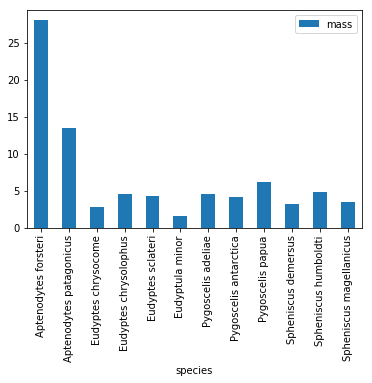

In [360]:
#You requested a simple bar plot looking at the mass for each species
#This function uses the species column for the x axis and the mass column for the y axis
#Source https://eeob-biodata.github.io/2017-python-programming/03-starting-with-data/
penguins_df.plot.bar(x='species',y='mass')

In [361]:
#Heres the answers to your questions
#A1. The smallest penguin species is Eudyptula minor
#A2. This is the smallest penguin species and is also known as "little penguin" 
#This penguin is the basis for the mascot "Tux" , the official mascot for Linux!
#Source http://animaldiversity.org/accounts/Eudyptula_minor/, https://www.beautyofbirds.com/littlepenguins.html

In [362]:
#I will now import some more plotting tools similar to what I learned in my bioinformatics class
import matplotlib.pyplot as plt
import seaborn as sns


In [366]:
#I kept getting errors when I was using my previous penguins dataframe so I had to convert the 
#values to float values instead (as recommended by the Python error warning messages I repeatedly
#got...)
from functools import partial

In [371]:
#This is my float dataframe, now I can do some cool plotting
#https://stackoverflow.com/questions/16729483/converting-strings-to-floats-in-a-dataframe
penguin_float = penguins_df_complete.apply(partial(pd.to_numeric, errors='ignore'))

In [372]:
#Looks good, the values are smaller now, maybe thats what was causing the previous errors?..
penguin_float

,species,mass,molecular weight,GC content
0,Aptenodytes forsteri,28.00,42459.6021,48.381452
1,Aptenodytes patagonicus,13.40,42563.7067,49.693788
2,Eudyptes chrysocome,2.80,42475.5753,51.181102
3,Eudyptes chrysolophus,4.50,42445.5493,50.918635
4,Eudyptes sclateri,4.25,42475.5753,50.831146
5,Eudyptula minor,1.60,42491.6408,49.256343
6,Pygoscelis adeliae,4.60,42458.6140,49.081365
7,Pygoscelis antarctica,4.10,42404.5423,47.769029
8,Pygoscelis papua,6.10,42595.8759,47.156605
9,Spheniscus demersus,3.20,42431.5490,48.293963


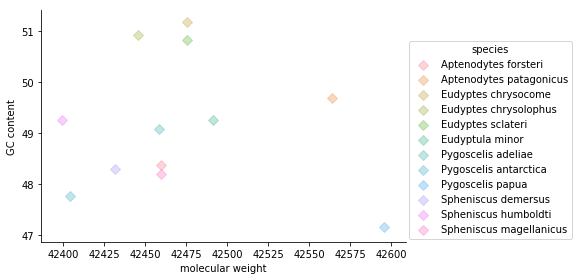

In [404]:
#Here I used the seaborn package to create a functional graph plotting GC content vs molecular 
#weight based on the species of penguin.  
#The species are outlined in the legend and now one can look at the relations between GC and 
#molecular weight. 
#Source https://eeob-biodata.github.io/2017-python-programming/05-seaborn-viz/
sns.lmplot("molecular weight", "GC content", data=penguin_float, fit_reg=False, size=4,
           aspect=1.5, scatter_kws={'alpha':0.3,"s": 50}, hue='species', markers='D')

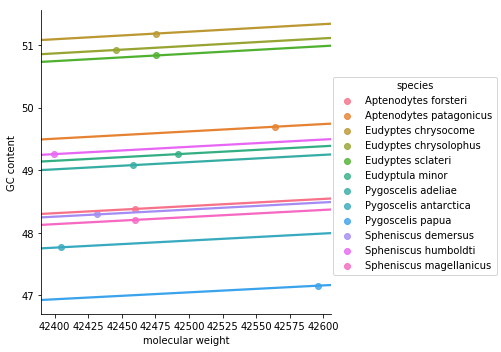

In [381]:
#Heres another cool graph showing the molecular weight vs GC content for each penguin species,
#I like this graph a bit more because its easier to see species.
#Source https://elitedatascience.com/python-seaborn-tutorial
sns.lmplot(data=penguin_float,
           x='molecular weight',
           y='GC content',
           hue='species')

In [382]:
#I now wanted to see if there was any sort of correlation between the mass, molecular weight, 
#and/or GC content of the penguin species.  The is a correlation tool
#Source https://elitedatascience.com/python-seaborn-tutorial
corr = penguin_float.corr()

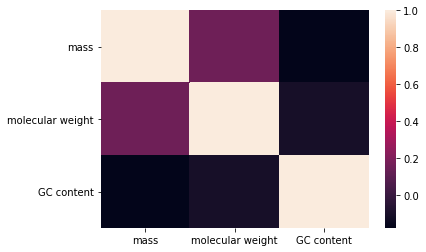

In [383]:
#Hmm, not much correlation between mass and GC content but there appears to be a small amount of
#connection between molecular weight and mass.  Interesting!
sns.heatmap(corr)

In [387]:
#This saves my penguin dataframe to a new file which you can view.
#Source https://stackoverflow.com/questions/16923281/pandas-writing-dataframe-to-csv-file
penguin_float.to_csv('penguins_mass_cytb.csv')


In [ ]:
#Thanks Dr. X! -Max 